Found 6270 images belonging to 151 classes.
Epoch 1/10
196/196 [==============================] - 59s 298ms/step - loss: 5.0086 - accuracy: 0.0126
Epoch 2/10
196/196 [==============================] - 55s 280ms/step - loss: 4.8153 - accuracy: 0.0242
Epoch 3/10
196/196 [==============================] - 55s 279ms/step - loss: 4.5902 - accuracy: 0.0498
Epoch 4/10
196/196 [==============================] - 55s 280ms/step - loss: 4.3645 - accuracy: 0.0699
Epoch 5/10
196/196 [==============================] - 55s 278ms/step - loss: 4.1989 - accuracy: 0.0920
Epoch 6/10
196/196 [==============================] - 55s 281ms/step - loss: 3.9969 - accuracy: 0.1239
Epoch 7/10
196/196 [==============================] - 64s 324ms/step - loss: 3.8204 - accuracy: 0.1496
Epoch 8/10
196/196 [==============================] - 61s 311ms/step - loss: 3.6690 - accuracy: 0.1660
Epoch 9/10
196/196 [==============================] - 59s 302ms/step - loss: 3.5212 - accuracy: 0.1944
Epoch 10/10
196/196 [========

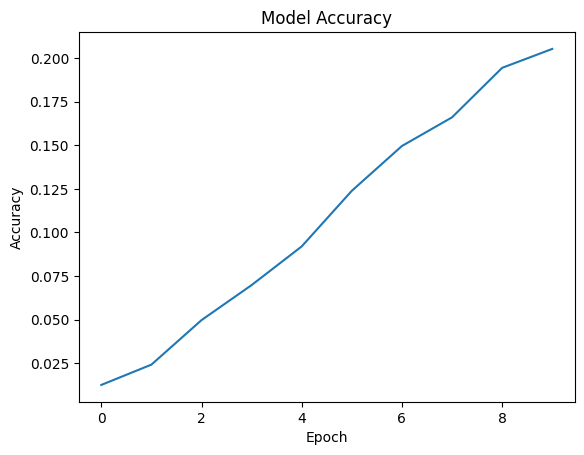

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных
train_datagen = ImageDataGenerator(rescale=1.0/255, # Масштабирование пикселей в диапазоне [0, 1]
                                   shear_range=0.2, # Сдвиги искажения
                                   zoom_range=0.2, # Масштабирование искажения
                                   horizontal_flip=True) # Горизонтальное отражение

# Загрузка обучающего набора данных
train_generator = train_datagen.flow_from_directory(
        'D:\\Изображения для итоговой работы 2\\dataset',  # Полный путь к папке с обучающими данными
        target_size=(128, 128),  # Размер изображения
        batch_size=32, # Размер пакета данных
        class_mode='categorical') # Классификация по нескольким классам

# Создание модели нейронной сети
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(128, 128, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_generator.class_indices), activation='softmax'))

# Компиляция модели
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Обучение модели
history = model.fit(train_generator, epochs=10, steps_per_epoch=len(train_generator), verbose=1)

# Визуализация результатов обучения
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Сохранение модели
model.save('animal_classification_model.keras')


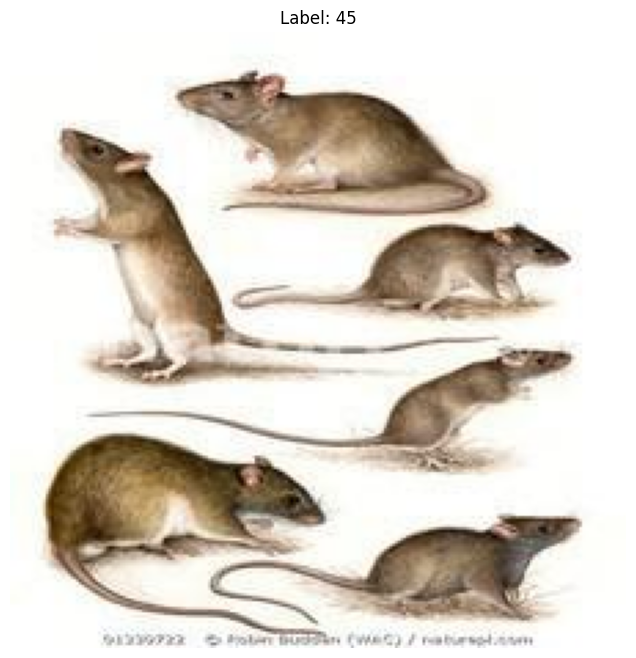

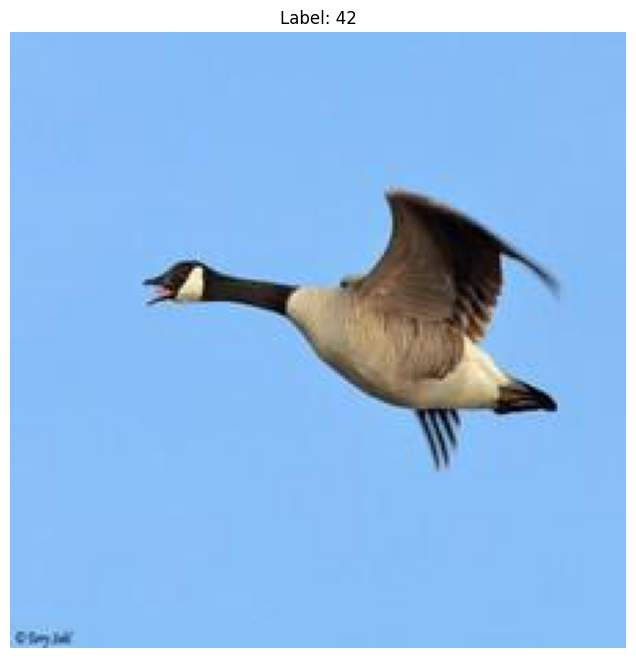

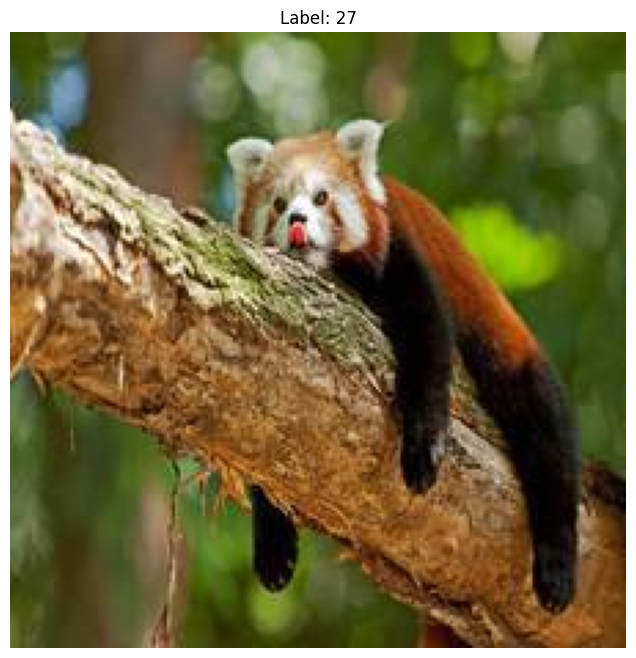

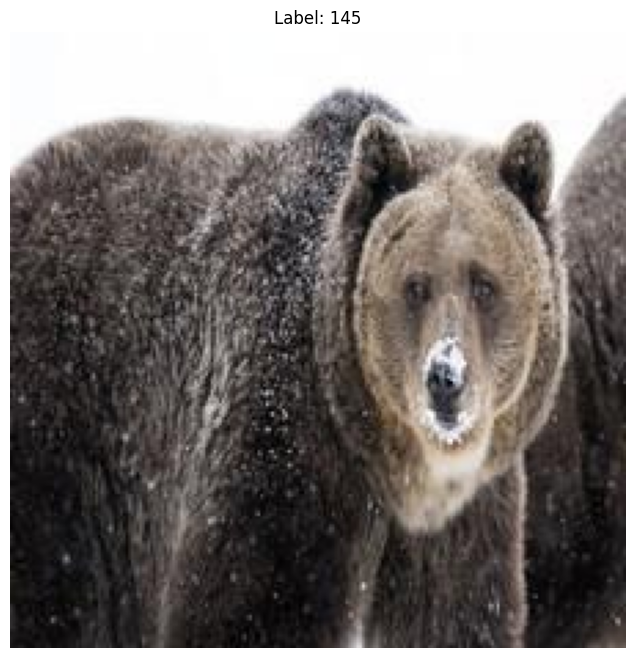

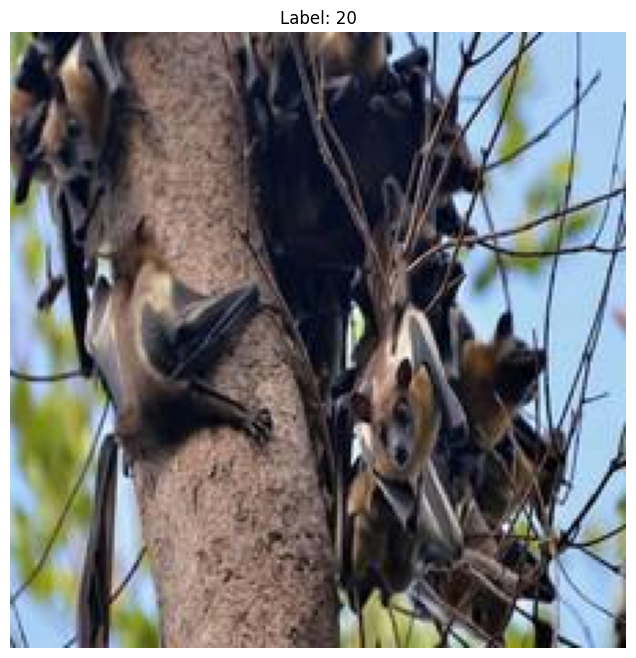

In [4]:
import matplotlib.pyplot as plt
import random

num_images_to_display = 5

random.seed(42)
sample_images, sample_labels = random.sample(list(train_generator.filepaths), num_images_to_display), random.sample(list(train_generator.labels), num_images_to_display)

for i in range(num_images_to_display):
    plt.figure(figsize=(8, 8))
    img = plt.imread(sample_images[i])
    plt.imshow(img)
    plt.title(f"Label: {sample_labels[i]}")
    plt.axis('off')
    plt.show()
